## 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset
data = pd.read_csv("data/cs-training.csv", index_col = 0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
# fill the missing value
## firstly, we check the nan number of each feature
data.isna().sum(axis=0)

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
# we find that only MonthlyIncome and NumberOfDependents have nan value.
# Then, we fill the missing value with mean of the feature
data["MonthlyIncome"] = data["MonthlyIncome"].fillna(value = data["MonthlyIncome"].mean())
data["NumberOfDependents"] = data["NumberOfDependents"].fillna(value = data["NumberOfDependents"].mean())
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
# partition the training set and test set
from sklearn.model_selection import train_test_split

X = data.drop(columns="SeriousDlqin2yrs")
y = data[["SeriousDlqin2yrs"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
# standardize X
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) #注意fit的用法
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
y_train = np.array(y_train["SeriousDlqin2yrs"])
y_test = np.array(y_test["SeriousDlqin2yrs"])

## 2. LogisticRegression with L1 penalty

Firstly, we define the plot function: plot_decision_regions()

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In order to get 2 most important feature, we traverse each C and check the estimation of coef

In [8]:
from sklearn.linear_model import LogisticRegression

#record the number of coef
coef_num = []

#record the estimation results of coef
coef_result = {}
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, penalty = "l1",random_state=1,solver = "liblinear", multi_class='ovr')
    lr.fit(X_train_std, y_train)
    feature_num = sum(sum(lr.coef_ !=0))
    coef_num.append([10.**c,feature_num])
    coef_result[10.**c] = lr.coef_

we firstly check the feature number given different value of C

In [9]:
# show the coef number under different parameter C
coef_num

[[1e-05, 0],
 [0.0001, 0],
 [0.001, 2],
 [0.01, 8],
 [0.1, 10],
 [1.0, 10],
 [10.0, 10],
 [100.0, 10],
 [1000.0, 10],
 [10000.0, 10]]

we find that when C = 0.001, feature number equals to 2, now we check the estimation results given C = 0.001

In [10]:
coef_result[0.001]

array([[ 0.        , -0.26957673,  0.10883184,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

We see that the second and third coefficients are left. Thus, we select these 2 features.

In [11]:
#select these two features
X_train_std_selected = X_train_std[:,1:3]
X_test_std_selected = X_test_std[:,1:3]

In [12]:
#Train the logistic regression again
lr = LogisticRegression(C=1.0, penalty = "l1",random_state=1,solver = "liblinear", multi_class='ovr')
lr.fit(X_train_std_selected, y_train)

LogisticRegression(multi_class='ovr', penalty='l1', random_state=1,
                   solver='liblinear')

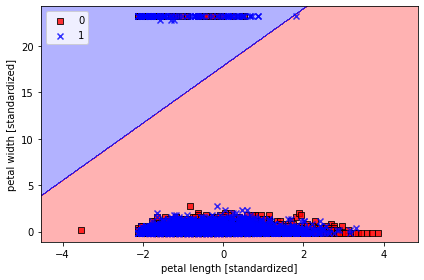

In [13]:
plot_decision_regions(X_train_std_selected, y_train,
                      classifier=lr) # test_idx=range(105, 150)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## 3. SVM

We select the parameters based on its performance on the test set.

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

gamma = [0.1 , 1, 10]
C = [0.1 , 1, 10]
acc_set = []
para_set  = []
for i in gamma:
    for j in C:
        svm = SVC(kernel='rbf', random_state=1, gamma= i, C= j , max_iter = 1000)
        svm.fit(X_train_std_selected, y_train)
        y_predict = svm.predict(X_test_std_selected)
        acc = accuracy_score(y_test, y_predict)
        acc_set.append(acc)
        para_set.append([i,j])

In [15]:
#check the accuracy under different parameters 
print(acc_set)
print(para_set)

[0.10497777777777778, 0.10497777777777778, 0.10497777777777778, 0.3057111111111111, 0.3057111111111111, 0.5986444444444444, 0.7600888888888889, 0.9092666666666667, 0.8133111111111111]
[[0.1, 0.1], [0.1, 1], [0.1, 10], [1, 0.1], [1, 1], [1, 10], [10, 0.1], [10, 1], [10, 10]]


It seems the model has the highest accuracy with gamma = 10 and C = 1.

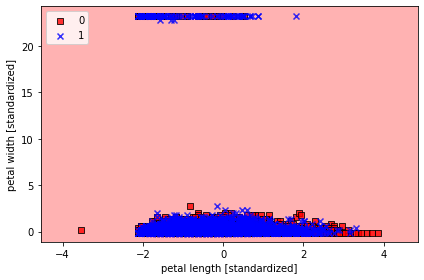

In [16]:
svm = SVC(kernel='rbf', random_state=1, gamma= 10, C= 1 , max_iter = 1000)
svm.fit(X_train_std_selected, y_train)

plot_decision_regions(X_train_std_selected, y_train,
                      classifier=svm) # test_idx=range(105, 150)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## 4. Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

depth = [3,4,5,6,7,8]
acc_set = []
para_set  = []
for i in depth:
    tree_model = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=1)
    tree_model.fit(X_train_std_selected, y_train)
    y_predict = tree_model.predict(X_train_std_selected)
    acc = accuracy_score(y_train, y_predict)
    acc_set.append(acc)
    para_set.append(i)

In [18]:
#check the accuracy under different parameters 
print(acc_set)
print(para_set)

[0.9331619047619047, 0.9333904761904762, 0.9336571428571429, 0.9337714285714286, 0.9338285714285715, 0.9339619047619048]
[3, 4, 5, 6, 7, 8]


It can be seen from the results that the model has the highest accuracy with max_depth = 8.

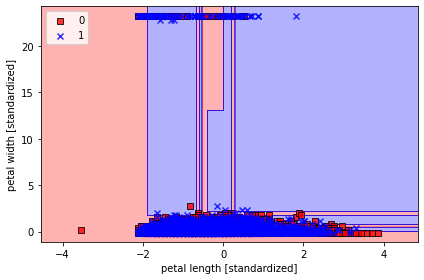

In [19]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)
tree_model.fit(X_train_std_selected, y_train)

plot_decision_regions(X_train_std_selected, y_train,
                      classifier=tree_model) # test_idx=range(105, 150)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## 5. Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [20,30,40,50,100]
acc_set = []
para_set  = []
for i in n_estimators:
    forest = RandomForestClassifier(criterion='gini',
                                n_estimators=i, 
                                random_state=1,
                                n_jobs=2)
    forest.fit(X_train_std_selected, y_train)
    y_predict = forest.predict(X_train_std_selected)
    acc = accuracy_score(y_train, y_predict)
    acc_set.append(acc)
    para_set.append(i)

In [21]:
#check the accuracy under different parameters 
print(acc_set)
print(para_set)

[0.9348666666666666, 0.9349142857142857, 0.9349047619047619, 0.9349142857142857, 0.9349142857142857]
[20, 30, 40, 50, 100]


It can be seen from the results that the model has the highest accuracy with n_estimators = 30.

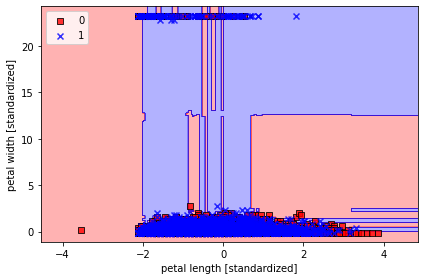

In [22]:
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=30 , 
                                random_state=1 ,
                                n_jobs=2)
forest.fit(X_train_std_selected, y_train)

plot_decision_regions(X_train_std_selected, y_train,
                      classifier=forest) # test_idx=range(105, 150)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## 6. Predict on the test set

In [27]:
data_test = pd.read_csv("data/cs-test.csv", index_col = 0)
data_test = data_test.drop(columns="SeriousDlqin2yrs")
data_test_std = sc.transform(data_test)
data_test_std = data_test_std[:,1:3]

In [28]:
data_test_Y = pd.read_csv("data/sampleEntry.csv", index_col = 0)
data_test_Y.head()

,Probability
Id,
1,0.080807
2,0.040719
3,0.011968
4,0.067640
5,0.108264


In [29]:
#Because the label of test_Y is probability, we take y=1 if probability > 0.5 , else y = 0
data_test_Y.loc[data_test_Y["Probability"] > 0.5,:] = 1
data_test_Y.loc[data_test_Y["Probability"] <= 0.5,:] = 0

In [36]:
data_test_Y = np.array(data_test_Y["Probability"])

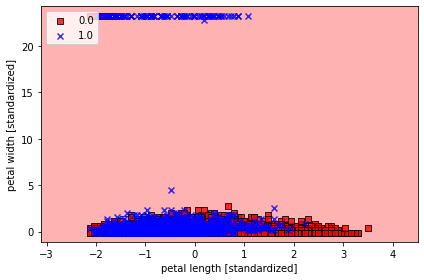

In [37]:
## SVM ##
plot_decision_regions(data_test_std, data_test_Y,
                      classifier=svm) # test_idx=range(105, 150)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

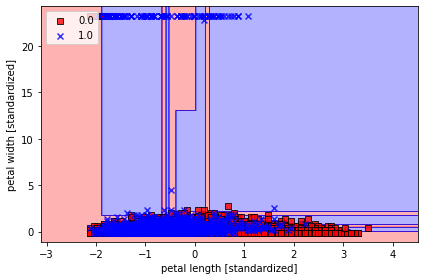

In [38]:
## Decision Tree ##
plot_decision_regions(data_test_std, data_test_Y,
                      classifier=tree_model) # test_idx=range(105, 150)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

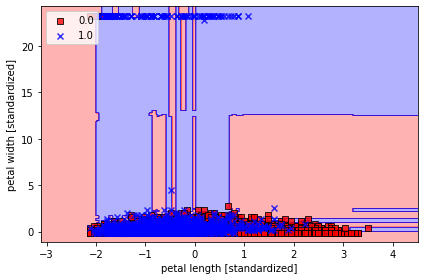

In [39]:
## Random Forest ##
plot_decision_regions(data_test_std, data_test_Y,
                      classifier=forest) # test_idx=range(105, 150)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

As can be seen from the figure, most of the "y = 1" samples were not classified correctly. At the same time, the positions of the two kinds of samples overlap highly in the figure, considering that the features used may not be sufficient